In [261]:
import pandas as pd
import numpy as np


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve

import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
df = pd.read_csv('creditcard.csv')

In [162]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [163]:
df['Class'].unique()

array([0, 1])

In [164]:
classi = df['Class'].value_counts()
classi

0    284315
1       492
Name: Class, dtype: int64

In [165]:
df['hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

In [271]:
def PlotHistogram(df,norm):
    bins = np.arange(df['hour'].min(),df['hour'].max()+2)
    plt.figure(figsize=(15,4))
    sns.distplot(df[df['Class']==1.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='g',
                 label='Fraud',
                 hist_kws={'alpha':.5}),
    sns.distplot(df[df['Class']==0.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='r',
                 hist_kws={'alpha':.5},
                 label='Non-Fraud')
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()


Normalized histogram of Legit/Fraud over hour of the day


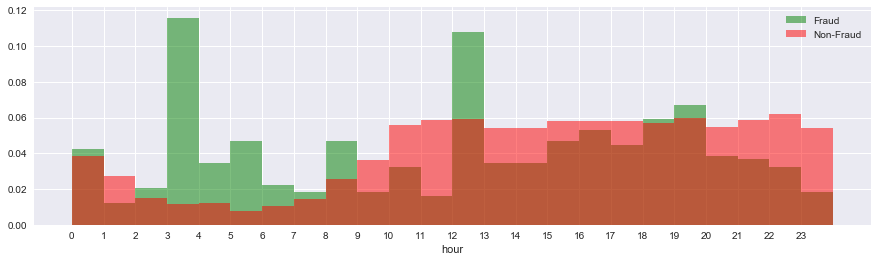

Counts histogram of both fraudulent and non fraudover hour of the day


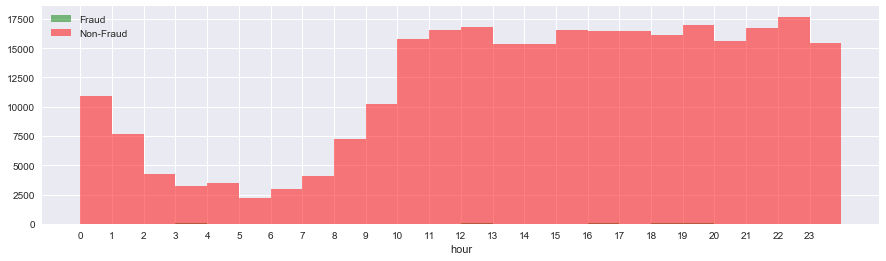

1.81837081909


In [272]:
start = time.time()
print('Normalized histogram of Legit/Fraud over hour of the day')
PlotHistogram(df,True)
print('Counts histogram of both fraudulent and non fraudover hour of the day')
PlotHistogram(df,False)
print(time.time()-start)

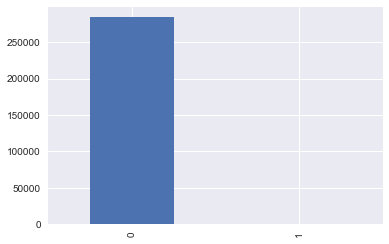

In [168]:
classi.plot(kind ='bar')
plt.show()

In [169]:
df.info() #-No null values in this dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [170]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))
df = df.drop(['Time'],axis=1)
df.head()

/Users/LP-Macintosh/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,1.0


Resampling.
As this is skewed data, under-sampling technique is used to have uniform data set.

In [171]:
X = df.drop('Class' , axis=1)
y = df['Class']

In [172]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,1.0


In [173]:
# Number of data points in the minority class
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.array(np.random.choice(normal_indices, number_records_fraud, replace = False))

# Appending the 2 indices
under_sampled_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sampled_data = df.iloc[under_sampled_indices,:]

X_sampled = under_sampled_data.drop('Class', axis = 1)
y_sampled = under_sampled_data['Class']

print(X.columns)

# Showing ratio
print("Resampled normal transactions: ", len(under_sampled_data[under_sampled_data.Class == 0]))
print("Resampled fraud transactions: ", len(under_sampled_data[under_sampled_data.Class == 1]))
print("Total number of transactions in resampled data: ", len(under_sampled_data))

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28',
       u'Amount', u'hour'],
      dtype='object')
('Resampled normal transactions: ', 492)
('Resampled fraud transactions: ', 492)
('Total number of transactions in resampled data: ', 984)


Normalized histogram of Legit/Fraud over hour of the day


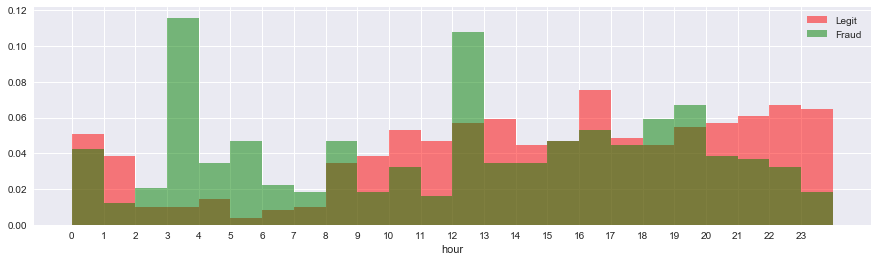

Counts histogram of Legit/Fraud over hour of the day
*you can barely see the Fraud cases since there are so little of them.


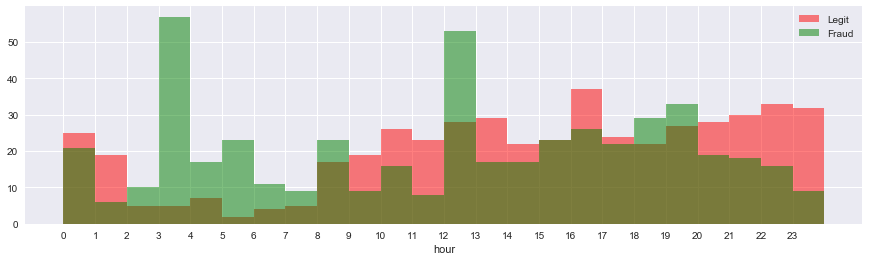

1.4780831337


In [174]:
start = time.time()
print('Histogram of all transactions over an hour of the day')
PlotHistogram(under_sampled_data,True)
print('Counts histogram of Legit/Fraud over hour of the day')
PlotHistogram(under_sampled_data,False)
print(time.time()-start)

In [175]:
sampled_Classi = under_sampled_data['Class'].value_counts()
sampled_Classi

1    492
0    492
Name: Class, dtype: int64

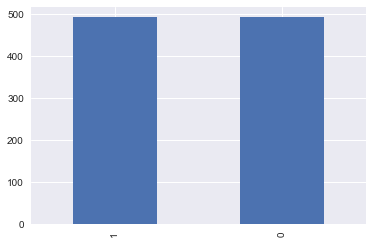

In [176]:
sampled_Classi.plot(kind='bar')
plt.show()

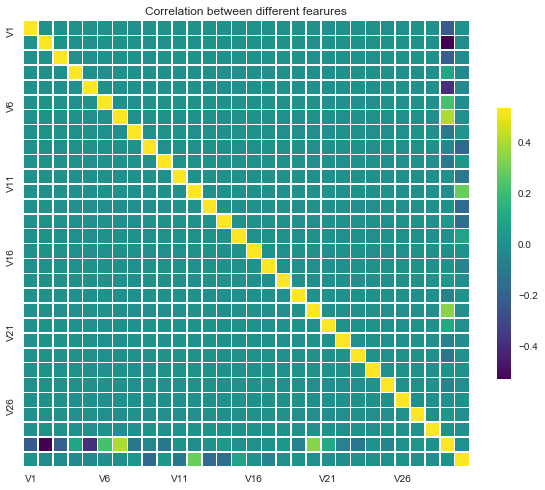

In [177]:
import seaborn as sns
# correlation matrix for margin features
corr = X.corr()
#corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='viridis', vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different fearures')

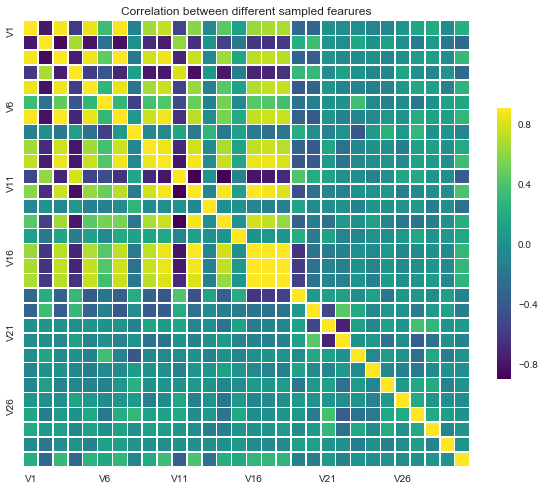

In [178]:
# correlation matrix for margin features
corr = X_sampled.corr()
#corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='viridis', vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different sampled fearures')
plt.show()

In [186]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [237]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [238]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [287]:
# split sampled data
X_sampled_train, X_sampled_test, y_sampled_train, y_sampled_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)
print(X_sampled_train.shape)
print(X_sampled_test.shape)


from sklearn.linear_model.logistic import LogisticRegression
lr = LogisticRegression()
lr.fit(X_sampled_train, y_sampled_train)
pred_lr_sampled = lr.predict(X_sampled_test)


print('Accuracy:', accuracy_score(y_sampled_test, pred_lr_sampled))

(787, 30)
(197, 30)
('Accuracy:', 0.95431472081218272)


In [288]:
conf_matrix_lr = (confusion_matrix(y_sampled_test,pred_lr_sampled))

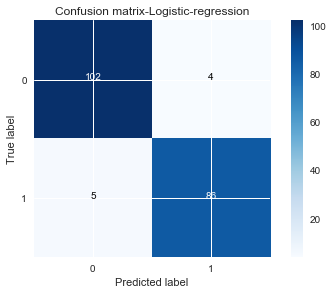

In [289]:
# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_matrix_lr
                      , classes=class_names
                      , title='Confusion matrix-Logistic-regression')
plt.show()

In [249]:
print(classification_report(y_sampled_test,pred_lr))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       106
          1       0.96      0.95      0.95        91

avg / total       0.95      0.95      0.95       197



In [252]:
pred_lr = lr.predict(X_test)


In [253]:
conf_matrix_lr = (confusion_matrix(y_test,pred_lr))

In [254]:
print('Accuracy:', accuracy_score(y_test, y_pred))

('Accuracy:', 0.96543894760249527)


In [256]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85296
          1       0.04      0.93      0.08       147

avg / total       1.00      0.97      0.98     85443



In [191]:
from sklearn.svm import SVC
svc = SVC()

In [192]:
svc = svc.fit(X_sampled_train , y_sampled_train)

In [273]:
pred_svc_sampled = svc.predict(X_sampled_test)

In [274]:
score_svm = accuracy_score(pred_svc,y_sampled_test)
score_svm

0.93401015228426398

In [275]:
from sklearn.metrics import classification_report,confusion_matrix

In [276]:
conf_matrix_svm = (confusion_matrix(y_sampled_test,pred_svc))

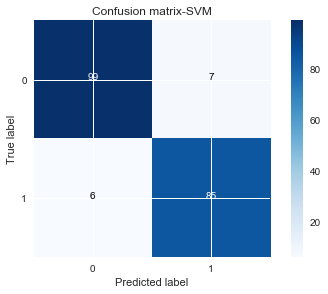

In [197]:

# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_matrix_svm
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [280]:
print(classification_report(y_sampled_test,pred_svc_sampled))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       106
          1       0.92      0.93      0.93        91

avg / total       0.93      0.93      0.93       197



In [277]:
pred_svc = svc.predict(X_test)

In [281]:
score_svm = accuracy_score(pred_svc,y_test)
score_svm

0.9311821916365296

In [278]:
print(classification_report(y_test,pred_svc))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     85296
          1       0.02      0.95      0.05       147

avg / total       1.00      0.93      0.96     85443



In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
scores = cross_val_score(svc, X_sampled_train, y_sampled_train , cv = 5)

In [201]:
print(scores)

[ 0.88050314  0.91082803  0.92993631  0.95541401  0.92356688]


In [202]:
from sklearn.model_selection import GridSearchCV


In [203]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [204]:
grid = GridSearchCV(svc,param_grid,refit=True,verbose=2)
grid.fit(X_sampled_train,y_sampled_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [205]:
grid_predictions = grid.predict(X_sampled_test)

In [206]:
conf_matrix_grid = (confusion_matrix(y_sampled_test,grid_predictions))

In [207]:
print(conf_matrix_grid)

[[97  9]
 [ 6 85]]


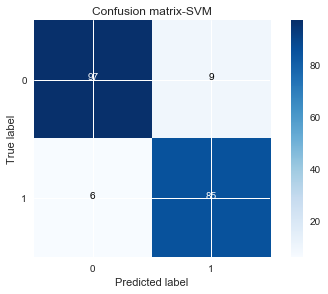

In [232]:
# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_matrix_grid
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [209]:
print(classification_report(y_sampled_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93       106
          1       0.90      0.93      0.92        91

avg / total       0.92      0.92      0.92       197



In [210]:
score_grid_sampled = accuracy_score(grid_predictions,y_sampled_test)

In [211]:
score_grid_sampled

0.92385786802030456

In [212]:
y_pred_svc = svc.predict(X_test)

In [213]:
score_grid = accuracy_score(y_pred_svc,y_test)

In [214]:
score_grid

0.9311821916365296

In [215]:
print(classification_report(y_test,y_pred_svc))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     85296
          1       0.02      0.95      0.05       147

avg / total       1.00      0.93      0.96     85443



In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
rf = RandomForestClassifier()

In [218]:
rf = rf.fit(X_sampled_train,y_sampled_train)

In [219]:
pred_rf_sampled = rf.predict(X_sampled_test)

In [220]:
rf_score = accuracy_score(pred_rf_sampled,y_sampled_test)


In [221]:
rf_score

0.9441624365482234

In [222]:
conf_matrix_rf = (confusion_matrix(y_sampled_test,pred_rf_sampled))

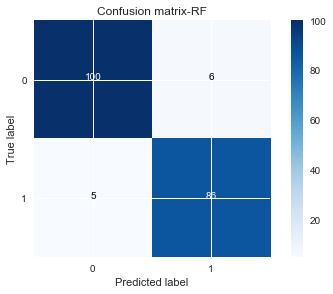

In [231]:
# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_matrix_rf
                      , classes=class_names
                      , title='Confusion matrix-RF')
plt.show()

In [224]:
print(classification_report(y_sampled_test,pred_rf_sampled))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95       106
          1       0.93      0.95      0.94        91

avg / total       0.94      0.94      0.94       197



In [225]:
pred_rf = rf.predict(X_test)
pred_prob_rf = rf.predict_proba(X_test)[:,1]


In [226]:
rf_score = accuracy_score(pred_rf,y_test)

In [227]:
print(rf_score)

0.959540278314


In [233]:
print(classification_report(y_test,pred_rf))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85296
          1       0.04      0.97      0.08       147

avg / total       1.00      0.96      0.98     85443



('roc_auc_svc', 0.92458013684428786)


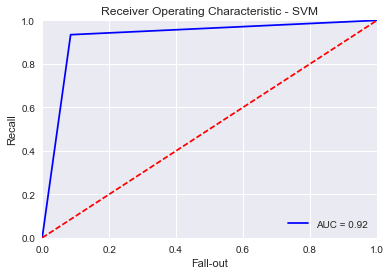

In [228]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

p,r,_ = precision_recall_curve(y_test,pred_prob_rf)

false_positive_rate, recall, thresholds = \
    roc_curve(y_sampled_test,grid_predictions)
roc_auc = auc(false_positive_rate, recall)
print('roc_auc_svc', roc_auc)
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate, recall, 'b',
         label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

('roc_auc_rf', 0.94422558573501969)


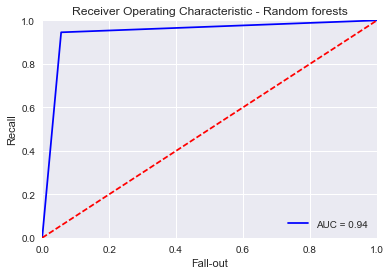

In [229]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


false_positive_rate, recall, thresholds = \
    roc_curve(y_sampled_test,pred_rf_sampled)
roc_auc = auc(false_positive_rate, recall)
print('roc_auc_rf', roc_auc)
plt.title('Receiver Operating Characteristic - Random forests')
plt.plot(false_positive_rate, recall, 'b',
         label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

('roc_auc_LR', 0.95365954799917063)


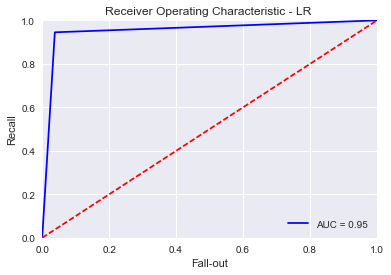

In [230]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


false_positive_rate, recall, thresholds = \
    roc_curve(y_sampled_test,pred_lr)
roc_auc = auc(false_positive_rate, recall)
print('roc_auc_LR', roc_auc)
plt.title('Receiver Operating Characteristic - LR ')
plt.plot(false_positive_rate, recall, 'b',
         label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()